### Ch9_1_1.py

Using TensorFlow backend.


170500096/170498071 [==============================] - 233s 1us/step
X_train.shape:  (50000, 32, 32, 3)
Y_train.shape:  (50000, 1)
X_test.shape:  (10000, 32, 32, 3)
Y_test.shape:  (10000, 1)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[6]


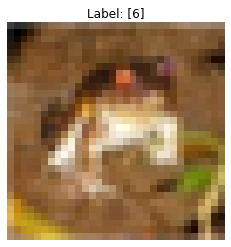

In [1]:
from keras.datasets import cifar10
%matplotlib inline

# 載入 Cifar10 資料集, 如果是第一次載入會自行下載資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 形狀
print("X_train.shape: ", X_train.shape)
print("Y_train.shape: ", Y_train.shape)
print("X_test.shape: ", X_test.shape)
print("Y_test.shape: ", Y_test.shape)
# 顯示 Numpy 二維陣列內容
print(X_train[0])
print(Y_train[0])   # 標籤資料

import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="binary")
plt.title("Label: " + str(Y_train[0]))
plt.axis("off")
# 顯示圖片
plt.show()

### Ch9_1_1a.py

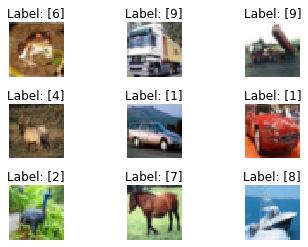

In [2]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
# 載入 Cifar10 資料集, 如果是第一次載入會自行下載資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 繪出9張圖片
sub_plot= 330
for i in range(0, 9):
    ax = plt.subplot(sub_plot+i+1)
    ax.imshow(X_train[i], cmap="binary")
    ax.set_title("Label: " + str(Y_train[i]))
    ax.axis("off")

plt.subplots_adjust(hspace = .5)
# 顯示數字圖片
plt.show()

### Ch9_1_2.py

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

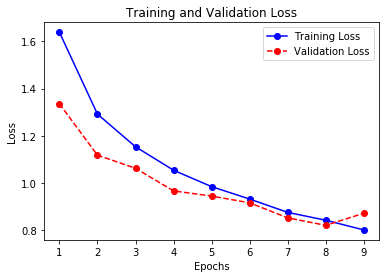

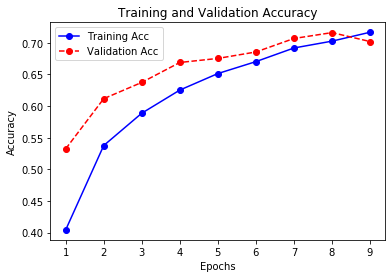

In [4]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.utils import to_categorical

# 指定亂數種子
seed = 10
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# One-hot編碼
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
# 定義模型
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding="same",
                 input_shape=X_train.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), padding="same",
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, 
                    epochs=9, batch_size=128, verbose=2)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 儲存Keras模型
print("Saving Model: cifar10.h5 ...")
model.save("cifar10.h5")
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### output = input_channel * filter_window * filter_unit * filter_bias
* 896 = 3 * (3 * 3) * 32 + 32 
* 18496 = 32  * (3 * 3) * 64 + 64
* 4096 = 8 * 8 * 64
* 2097664 = 4096 * 512 + 512
* 5130 = 512 * 10 + 10

### Ch9_1_3.py

In [6]:
import numpy as np
import pandas as pd
from keras.datasets import cifar10
from keras.models import Sequential
from keras.models import load_model
from keras.utils import to_categorical

# 指定亂數種子
seed = 10
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_test = X_test.astype("float32") / 255
# One-hot編碼
Y_test_bk = Y_test.copy()   # 備份 Y_test 資料集
Y_test = to_categorical(Y_test)
# 建立Keras的Sequential模型
model = Sequential()
model = load_model("cifar10.h5")
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 評估模型
print("Testing ...")
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 計算分類的預測值
print("\nPredicting ...")
Y_pred = model.predict_classes(X_test)
# 顯示混淆矩陣
tb = pd.crosstab(Y_test_bk.astype(int).flatten(), 
                 Y_pred.astype(int),
                 rownames=["label"], colnames=["predict"])
print(tb)
tb.to_html("Ch9_1_3.html")

Testing ...
10000/10000 [==============================] - 2s 212us/step
測試資料集的準確度 = 0.69

Predicting ...
predict    0    1    2    3    4    5    6    7    8    9
label                                                    
0        677   11   75   23   45   16   26   19   53   55
1         11  709   14   20    4    7   43    7   27  158
2         34    0  514   55  167   76  105   38    2    9
3          9    2   48  487  101  212  104   26    5    6
4          7    1   36   61  748   26   69   44    7    1
5          7    0   44  158   72  634   45   34    3    3
6          2    0   30   42   50   16  853    4    2    1
7          6    0   26   34  108   71   12  733    2    8
8         62   20   15   25   29   26   28    6  755   34
9         22   29    4   27   15   15   23   28   22  815


### Ch9_1_3a.py
* positive prediction

Predicting ...


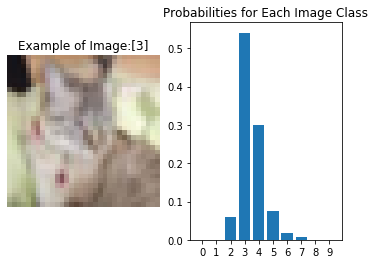

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.models import load_model

# 指定亂數種子
seed = 10
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 選一個測試的圖片 
# i = np.random.randint(0, len(X_test))
i = 8
img = X_test[i]
# 將圖片轉換成 4D 張量
X_test_img = img.reshape(1, 32, 32, 3).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_test_img = X_test_img / 255
# 建立Keras的Sequential模型
model = Sequential()
model = load_model("cifar10.h5")
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 繪出圖表的預測結果
plt.figure()
plt.subplot(1,2,1)
plt.title("Example of Image:" + str(Y_test[i]))
plt.imshow(img, cmap="binary")
plt.axis("off")
# 預測結果的機率
print("Predicting ...")
probs = model.predict_proba(X_test_img, batch_size=1)
plt.subplot(1,2,2)
plt.title("Probabilities for Each Image Class")
plt.bar(np.arange(10), probs.reshape(10), align="center")
plt.xticks(np.arange(10),np.arange(10).astype(str))
plt.show()

### Ch9_1_3b.py
* false prediction

Predicting ...
    label  predict
9       1        9
15      8        6
24      5        4
25      2        4
31      5        4
Index:  5419


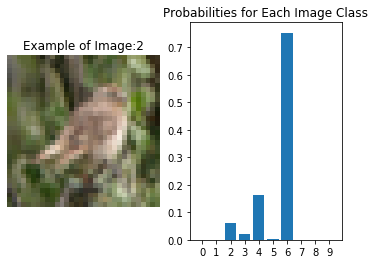

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.models import load_model

# 指定亂數種子
seed = 10
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_test = X_test.astype("float32") / 255
# 建立Keras的Sequential模型
model = Sequential()
model = load_model("cifar10.h5")
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 測試資料集的分類和機率的預測值
print("Predicting ...")
Y_pred = model.predict_classes(X_test)  # 分類
Y_probs = model.predict_proba(X_test)   # 機率
# 建立分類錯誤的 DataFrame 物件
Y_test = Y_test.flatten()
df = pd.DataFrame({"label":Y_test, "predict":Y_pred})
df = df[Y_test!=Y_pred]  # 篩選出分類錯誤的資料
print(df.head())
df.head().to_html("Ch9_1_3b.html")
# 隨機選 1 個錯誤分類的數字索引
i = df.sample(n=1).index.values.astype(int)[0]
print("Index: ", i)
img = X_test[i] 
# 繪出圖表的預測結果
plt.figure()
plt.subplot(1,2,1)
plt.title("Example of Image:" + str(Y_test[i]))
plt.imshow(img, cmap="binary")
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Probabilities for Each Image Class")
plt.bar(np.arange(10), Y_probs[i].reshape(10), align="center")
plt.xticks(np.arange(10),np.arange(10).astype(str))
plt.show()